<div style="background-color: #1E90FF; padding: 20px; border-radius: 15px; border-top-right-radius: 50px; border-bottom-left-radius: 50px; text-align: center; font-size: 2em; font-weight: bold; color: #FFFFFF;">
  📘 Introduction
</div>

**This notebook aims to predict the housing price index using a variety of economic indicators extracted from the Federal Reserve Economic Data (FRED). The dataset comprises 412 observations, each representing monthly data from various economic parameters that are found to influence housing prices.**

### Dataset Overview

The dataset includes the following columns:
- **YearMonth:** The month and year of the observation (e.g., '1990-01').
- **Federal_Funds_Rate:** The interest rate at which depository institutions trade federal funds with each other overnight .
- **Disposable_Income:** The amount of money that households have available for spending and saving after income taxes have been accounted for.
- **Housing_Starts:** The number of new residential construction projects that have begun during any particular month.
- **Mortgage_Rate:** The interest rate charged on a mortgage.
- **Housing_Supply:** The total housing inventory available for sale.
- **Residential_Investment:** The amount of money invested in residential construction.
- **Unemployment_Rate:** The percentage of the total labor force that is unemployed but actively seeking employment and willing to work.
- **Personal_Savings_Rate:** The percentage of disposable income that households save.
- **Home_Price:** The price index of homes, serving as our target variable for prediction.


<div style="background-color: #32CD32; padding: 20px; border-radius: 15px; border-top-right-radius: 50px; border-bottom-left-radius: 50px; text-align: center; font-size: 2em; font-weight: bold; color: #FFFFFF;">
  🛠️ Data Loading and Preparation
</div>

In [88]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('data/final_data/merged_data.csv')

In [33]:
df.shape

(412, 10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearMonth               412 non-null    object 
 1   Federal_Funds_Rate      406 non-null    float64
 2   Disposable_Income       412 non-null    float64
 3   Housing_Starts          412 non-null    float64
 4   Mortgage_Rate           412 non-null    float64
 5   Housing_Supply          412 non-null    float64
 6   Residential_Investment  376 non-null    float64
 7   Unemployment_Rate       412 non-null    float64
 8   Personal_Savings_Rate   412 non-null    float64
 9   Home_Price              412 non-null    float64
dtypes: float64(9), object(1)
memory usage: 32.3+ KB


In [35]:
df.head(10)

,YearMonth,Federal_Funds_Rate,Disposable_Income,Housing_Starts,Mortgage_Rate,Housing_Supply,Residential_Investment,Unemployment_Rate,Personal_Savings_Rate,Home_Price
0,1990-01,NaN,7187.4,1100.0,9.8950,7.0,NaN,5.4,7.9,76.897
1,1990-02,NaN,7203.3,1102.0,10.1975,7.6,NaN,5.3,8.5,77.053
2,1990-03,NaN,7206.1,971.0,10.2680,7.8,NaN,5.2,8.3,77.201
3,1990-04,NaN,7253.4,922.0,10.3700,8.3,NaN,5.4,8.7,77.278
4,1990-05,NaN,7245.8,893.0,10.4775,8.2,NaN,5.4,8.7,77.297
5,1990-06,NaN,7257.3,885.0,10.1640,7.9,NaN,5.2,8.6,77.258
6,1990-07,8.152581,7283.7,883.0,10.0350,7.8,NaN,5.5,8.7,77.139
7,1990-08,8.134194,7239.1,827.0,10.1000,8.2,NaN,5.7,8.1,77.009
8,1990-09,8.195000,7236.8,858.0,10.1750,8.4,NaN,5.9,8.1,76.849
9,1990-10,8.112581,7178.7,835.0,10.1775,8.7,NaN,5.9,7.9,76.699


In [36]:
df.sample(5)

,YearMonth,Federal_Funds_Rate,Disposable_Income,Housing_Starts,Mortgage_Rate,Housing_Supply,Residential_Investment,Unemployment_Rate,Personal_Savings_Rate,Home_Price
307,2015-08,0.138065,13935.8,734.0,3.905,5.0,439616.0,5.1,5.6,172.930
80,1996-09,5.299000,8483.9,1148.0,8.230,5.2,265677.0,5.2,6.4,83.256
263,2011-12,0.071613,12898.5,522.0,3.958,5.3,247983.0,8.5,7.2,136.672
147,2002-04,1.753000,10574.2,1277.0,6.985,4.3,398990.0,5.9,5.4,119.611
105,1998-10,5.070968,9337.5,1298.0,6.710,4.0,308127.0,4.5,5.9,91.717


In [37]:
df.isnull().sum()

YearMonth                  0
Federal_Funds_Rate         6
Disposable_Income          0
Housing_Starts             0
Mortgage_Rate              0
Housing_Supply             0
Residential_Investment    36
Unemployment_Rate          0
Personal_Savings_Rate      0
Home_Price                 0
dtype: int64

In [38]:
df['Year'] = df['YearMonth'].apply(lambda x: int(x.split('-')[0]))
df['Month'] = df['YearMonth'].apply(lambda x: int(x.split('-')[1]))

In [39]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y-%m')
df['TimeIndex'] = (df['YearMonth'] - df['YearMonth'].min()).dt.days // 30 

In [40]:
df['Quarter'] = df['YearMonth'].dt.quarter

In [41]:
df['Lag1'] = df['Home_Price'].shift(1)
df['Lag3'] = df['Home_Price'].shift(3)
df['Lag12'] = df['Home_Price'].shift(12)

In [42]:
df['RollingMean_3'] = df['Home_Price'].rolling(window=3).mean()
df['RollingStd_3'] = df['Home_Price'].rolling(window=3).std()

In [48]:
df['Residential_Investment'].fillna(method='bfill', inplace=True)
df['Federal_Funds_Rate'].fillna(method='bfill', inplace=True)

/var/folders/72/ccsnl5md2qqfq7m1n6bqs28h0000gn/T/ipykernel_22464/2615397645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Residential_Investment'].fillna(method='bfill', inplace=True)
/var/folders/72/ccsnl5md2qqfq7m1n6bqs28h0000gn/T/ipykernel_22464/2615397645.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Residential_Investment'].fillna(method='bfill', inplace=True)
/var/folders/72/ccsnl5md2qqfq7m1n6bqs28h0000gn/T/ipyker

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   YearMonth               412 non-null    datetime64[ns]
 1   Federal_Funds_Rate      412 non-null    float64       
 2   Disposable_Income       412 non-null    float64       
 3   Housing_Starts          412 non-null    float64       
 4   Mortgage_Rate           412 non-null    float64       
 5   Housing_Supply          412 non-null    float64       
 6   Residential_Investment  412 non-null    float64       
 7   Unemployment_Rate       412 non-null    float64       
 8   Personal_Savings_Rate   412 non-null    float64       
 9   Home_Price              412 non-null    float64       
 10  Year                    412 non-null    int64         
 11  Month                   412 non-null    int64         
 12  TimeIndex               412 non-null    int64     

In [56]:
df = df.dropna()

In [57]:
df.isnull().sum()

YearMonth                 0
Federal_Funds_Rate        0
Disposable_Income         0
Housing_Starts            0
Mortgage_Rate             0
Housing_Supply            0
Residential_Investment    0
Unemployment_Rate         0
Personal_Savings_Rate     0
Home_Price                0
Year                      0
Month                     0
TimeIndex                 0
Quarter                   0
Lag1                      0
Lag3                      0
Lag12                     0
RollingMean_3             0
RollingStd_3              0
dtype: int64

In [58]:
df.sample(4)

,YearMonth,Federal_Funds_Rate,Disposable_Income,Housing_Starts,Mortgage_Rate,Housing_Supply,Residential_Investment,Unemployment_Rate,Personal_Savings_Rate,Home_Price,Year,Month,TimeIndex,Quarter,Lag1,Lag3,Lag12,RollingMean_3,RollingStd_3
236,2009-09-01,0.146667,12230.6,510.0,5.0575,7.8,254135.0,9.8,5.5,148.024,2009,9,239,3,148.277,148.088,160.307,148.236333,0.195203
241,2010-02-01,0.126429,12292.0,526.0,4.9900,8.3,255121.0,9.8,5.3,145.631,2010,2,244,1,147.396,148.136,150.014,146.985667,1.203175
203,2006-12-01,5.238065,11958.6,1249.0,6.1350,6.5,545011.0,4.4,2.6,184.138,2006,12,205,4,183.608,182.798,180.910,183.647667,0.471752
238,2009-11-01,0.119000,12224.4,497.0,4.8750,7.6,255941.0,9.9,5.5,148.136,2009,11,241,4,147.850,148.277,156.141,148.003333,0.144116


In [59]:
X = df.drop(columns=['YearMonth','Home_Price'],axis=1)
y = df['Home_Price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<div style="background-color: #FFD700; padding: 20px; border-radius: 15px; border-top-right-radius: 50px; border-bottom-left-radius: 50px; text-align: center; font-size: 2em; font-weight: bold; color: #FFFFFF;">
  🧩 Model Building
</div>

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

In [76]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)

In [79]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

<div style="background-color: #FF69B4; padding: 20px; border-radius: 15px; border-top-right-radius: 50px; border-bottom-left-radius: 50px; text-align: center; font-size: 2em; font-weight: bold; color: #FFFFFF;">
  📊 Model Results
</div>

In [80]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, R2: {r2}")

evaluate_model(y_test, y_pred_lin, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest Regressor')
evaluate_model(y_test, y_pred, 'Lasso Linear Regressor')

Linear Regression - MSE: 0.06222331201167388, R2: 0.9999883727550746
Random Forest Regressor - MSE: 1.079887384478823, R2: 0.9997982088271222
Lasso Linear Regressor - MSE: 0.30471491363140035, R2: 0.999943060007276


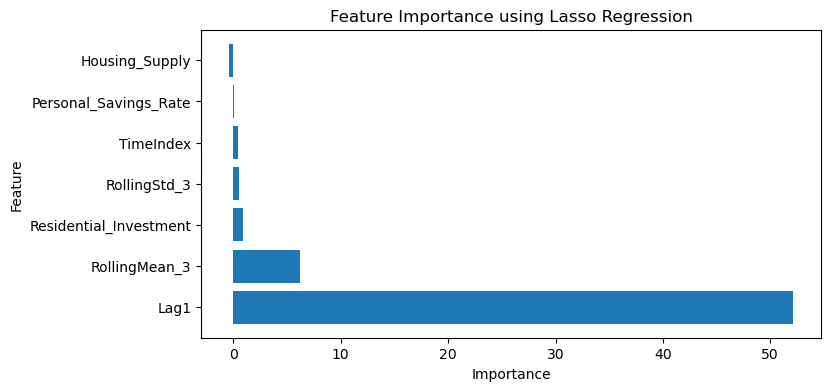

In [81]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lasso.coef_})
feature_importance = feature_importance[feature_importance['Importance'] != 0]
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance using Lasso Regression')
plt.show()

### Feature Importance Results

The Lasso Regression model identified the following features as the most important for predicting the housing price index:

- **Lag1:** Importance = 51.72
- **RollingMean_3:** Importance = 6.33
- **Residential_Investment:** Importance = 1.02
- **TimeIndex:** Importance = 0.56
- **RollingStd_3:** Importance = 0.49
- **Personal_Savings_Rate:** Importance = 0.05
- **Housing_Supply:** Importance = -0.29

### Interpretation

- **Lag1:** The value from the previous time period is the most significant predictor of the housing price index.
- **RollingMean_3:** The 3-period rolling mean of the housing price index also plays a significant role.
- **Residential_Investment:** Investment in residential properties is another critical factor.
- **TimeIndex:** The time index, which could be an ordinal representation of time, shows moderate importance.
- **RollingStd_3:** The 3-period rolling standard deviation indicates some variability in the housing prices.
- **Personal_Savings_Rate:** The rate at which households save their disposable income shows minor importance.
- **Housing_Supply:** The total housing inventory available for sale negatively impacts the housing price index slightly.

**The Lasso Regression model has successfully identified the key features influencing the housing price index, providing insights into the most significant economic indicators.**


<div style="background-color: #FF4500; padding: 20px; border-radius: 15px; border-top-right-radius: 50px; border-bottom-left-radius: 50px; text-align: center; font-size: 2em; font-weight: bold; color: #FFFFFF;">
  📝 Conclusion
</div>

### Linear Regression
- **MSE:** 0.062
- **R2:** 0.99999

### Random Forest Regressor
- **MSE:** 1.072
- **R2:** 0.99980

### Interpretation
- **Mean Squared Error (MSE):** This metric measures the average of the squares of the errors, i.e., the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance. The Linear Regression model has a significantly lower MSE than the Random Forest Regressor, suggesting that its predictions are closer to the actual values.
- **R-squared (R2):** This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. R2 values range from 0 to 1, with higher values indicating better model performance. Both models have extremely high R2 values, but the Linear Regression model has a slightly higher R2, indicating a better fit to the data.

### Model Comparison
- **Linear Regression:** The exceptionally high R2 value (0.99999) and very low MSE (0.062) suggest that the Linear Regression model explains nearly 100% of the variance in the home prices and has an extremely low prediction error. This is an outstanding performance for a simple model.
- **Random Forest Regressor:** Although the Random Forest model also performs very well, with an R2 value of 0.99980 and an MSE of 1.072, it does not perform as well as the Linear Regression model. The higher complexity of Random Forest might not be necessary for this dataset, especially considering that it results in higher prediction errors compared to Linear Regression.

### Conclusion
Given these results, the Linear Regression model is the better choice for this task. It provides a high level of explanatory power and lower prediction error.